In [1]:
# executeme
"""
Given the lattice and basis vectors calculate the site coordinates in real space using site index vectors
- site: Site index vector [ix, iy, ibasis]
- vv_lattice: List of lattice vectors [a1, a2]
- vv_basis: List of basis vectors (For a crystal with no basis vv_basis=[[0,0]])) [b1, b2] 
"""
function get_site_coordinate(site, vv_lattice, vv_basis)
    return vv_lattice[1] * site[1] + vv_lattice[2] * site[2] + vv_basis[site[3]]
end

get_site_coordinate

In [2]:
# executeme
"""
Construct the lattice given the lattice size, lattice and basis vectors. Returns site index vectors, coordinates and site numbers.
- LL: Lattice size
- vv_lattice: List of lattice vectors [a1, a2]
- vv_basis: List of basis vectors (For a crystal with no basis vv_basis=[[0,0]])) [b1, b2] 
"""
function get_sites(LL, vv_lattice, vv_basis)
    # coordinates = []; 
    sites = []; 
    site_coord=Dict{}()
    site_number=Dict{}()
    i_site=0
    for i2 in 0:LL[2]-1
       for i1 in 0:LL[1]-1
            for (i_basis, v_basis) in enumerate(vv_basis)
                site = [i1,i2,i_basis]
                sites = push!(sites, site)
                v_site = get_site_coordinate(site, vv_lattice, vv_basis)
                # coordinates = push!(coordinates, v_site)
                site_coord[site]=v_site
                i_site+=1
                site_number[site]=i_site
            end
        end
    end
    
    return sites, site_coord, site_number
end

get_sites

In [3]:
# executeme
"""
Returns the sign of the twist angle when hopping from site to neighbor if it wraps around the boundary, if it doesn't then returns zero
"""
function wrap_twist(site, neighbor, LL)
    i_neighbor  = site[1:2] + neighbor[1:2]
    wrap = zeros(2)
    for idir in 1:length(LL)
        if i_neighbor[idir] == -1
            wrap[idir] = -1
        elseif i_neighbor[idir] == LL[idir]
            wrap[idir] = 1
        else 
            wrap[idir] = 0
        end
    end
    return wrap
end

wrap_twist

In [4]:
# executeme
"""
Get neighbor site index vector given a site and a neighbor type
"""
function get_neighbor_site(site, neighbor, LL, pbc=true)
    i_neighbor  = site[1:2] + neighbor[1:2]
    #if !pbc && 
    #    (i_neighbor[1]==-1 || i_neighbor[1]==LL[1] || i_neighbor[2]==-1 || i_neighbor[2]==LL[2])
    # Open Boundary
    if !pbc && wrap_twist(site, neighbor, LL)!=[0,0]
        #error("no such neighbor with obc in get_neighbor_site")
        return nothing
    end 
    i_neighbor1 = mod(i_neighbor[1],LL[1])
    i_neighbor2 = mod(i_neighbor[2],LL[2])
    neighbor_site = [i_neighbor1, i_neighbor2, neighbor[3]] 
    return neighbor_site
end

get_neighbor_site

In [5]:
# executeme
"""
Get the neighbors of a site index vector given a site and a list of neighbor types
"""
function get_neighbors(site,neighbors,LL,pbc=true)
    neighbor_sites=[]
    for neighbor in neighbors
        neighbor_site = get_neighbor_site(site, neighbor, LL, pbc)
        if (neighbor_site!=nothing) push!(neighbor_sites,neighbor_site) end
    end
    return neighbor_sites
end

get_neighbors

In [6]:
# executeme
"""
Returns all the neighbors of all site in a lattice
"""
function get_all_neighbors(sites,neighbors_list,LL,pbc=true)
    site_neighbors=Dict{}()
    for site in sites
        i_site = site_number[site]
        #ib = (i_site-1)%nb+1
        neighbor_sites = get_neighbors(site,neighbors_list[site[3]],LL,pbc) 
        site_neighbors[site]=neighbor_sites
        #println(ib," ",site[3])
    end
    return site_neighbors
end

get_all_neighbors

In [7]:
# executeme
using Plots
function plot_points(sites, site_coord, site_number)
    xx = []
    yy = []
    label = []
    for site in sites
        x, y = site_coord[site]
        site_num = site_number[site]
        push!(xx, x);push!(yy, y);push!(label, site_num)
    end
    # coords_x = [coord[1] for coord in coords]
    # coords_y = [coord[2] for coord in coords]
    p = scatter(xx, yy, 
        series_annotations = text.(label, :bottom), 
        aspect_ratio=:equal,
        grid=:true, legend = false)
    return p
end

plot_points (generic function with 1 method)

In [8]:
#import Pkg; Pkg.add("Plots")

# Square lattice

In [9]:
param_dict=Dict{}()

Dict{Any, Any}()

In [10]:
LL = [3, 3]
vv_lattice = [ [1., 0], [0, 1.] ]
b1=[0, 0]
vv_basis = [b1];

In [11]:
param_dict["LL"] = LL
param_dict["vv_lattice"] = vv_lattice
param_dict["vv_basis"] = vv_basis

1-element Vector{Vector{Int64}}:
 [0, 0]

In [12]:
sites, site_coord, site_number = get_sites(LL, vv_lattice, vv_basis);

In [13]:
param_dict["sites"] = sites
param_dict["site_coord"] = site_coord
param_dict["site_number"] = site_number;

In [14]:
sites[1]

3-element Vector{Int64}:
 0
 0
 1

In [15]:
site_coord[sites[2]]

2-element Vector{Float64}:
 1.0
 0.0

In [16]:
site_number[sites[4]]

4

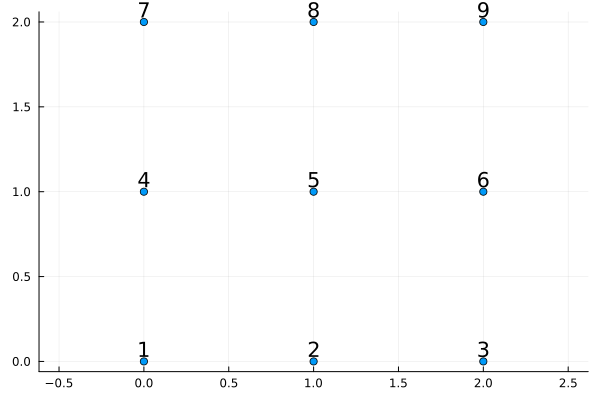

In [17]:
plot_points(sites, site_coord, site_number)

In [18]:
neighbor = [-1, 0, 1]

3-element Vector{Int64}:
 -1
  0
  1

In [19]:
pbc=true
neighbor_site = get_neighbor_site(sites[1], neighbor, LL, pbc)

3-element Vector{Int64}:
 2
 0
 1

In [20]:
(neighbor_site!=nothing) ? 
        println(site_number[neighbor_site], ' ', site_coord[neighbor_site]) : 
        println("no such neighbor")

3 [2.0, 0.0]


In [21]:
wrap_twist(sites[9],neighbor,LL)

2-element Vector{Float64}:
 0.0
 0.0

In [22]:
neighbors = [ [1, 0, 1], [-1, 0, 1], [0, 1, 1], [0, -1, 1]  ];

In [23]:
neighbor_sites = get_neighbors(sites[9],neighbors,LL)

4-element Vector{Any}:
 [0, 2, 1]
 [1, 2, 1]
 [2, 0, 1]
 [2, 1, 1]

In [25]:
for neighbor_site in neighbor_sites
    println(site_number[neighbor_site], site_coord[neighbor_site])
end

7[0.0, 2.0]
8[1.0, 2.0]
3[2.0, 0.0]
6[2.0, 1.0]


In [26]:
pbc=false
param_dict["pbc"] = pbc;
neighbors_list = [ neighbors ]
site_neighbors = get_all_neighbors(sites,neighbors_list,LL,pbc);

In [27]:
param_dict["neighbors_list"] = neighbors_list;
param_dict["site_neighbors"] = site_neighbors;

In [28]:
i_site=3
for neighbor_site in site_neighbors[sites[i_site]]
    println(site_number[neighbor_site])
end

2
6


# Hofstadter

In [29]:
# executeme

function get_Hofstadter_hop(site,neighbor,param_dict)
    wraps=wrap_twist(site,neighbor,param_dict["LL"])
    site_coord = param_dict["site_coord"]
    if param_dict["gauge"] == "Landau"
        if abs(neighbor[2])==1
            hop = param_dict["t"]
        elseif neighbor[1]==1
            hop = param_dict["t"]*exp(1im*2*pi*param_dict["ϕ"]*site_coord[site][2])
        elseif neighbor[1]==-1
            hop = param_dict["t"]*exp(-1im*2*pi*param_dict["ϕ"]*site_coord[site][2])
        end
        return hop*exp(1im*param_dict["θθ"][1]*wraps[1])*exp(-1im*param_dict["θθ"][2]*wraps[2])
    end
end

get_Hofstadter_hop (generic function with 1 method)

In [30]:
t=-1
ϕ=1/3
θθ = [0.2*pi, 0.4*pi]
param_dict["gauge"] = "Landau"
param_dict["t"]=t
param_dict["ϕ"]=ϕ
param_dict["θθ"]=θθ
i_site=1
neighbor=[0,1,1]
get_Hofstadter_hop(sites[i_site],neighbor,param_dict)

-1.0 + 0.0im

In [31]:
# executeme
function get_Hofstadter_hamiltonian(param_dict)
    LL   = param_dict["LL"]
    nb   = length(param_dict["vv_basis"])
    sites = param_dict["sites"]
    site_number = param_dict["site_number"]
    site_coord  = param_dict["site_coord"]
    neighbors_list = param_dict["neighbors_list"]
    pbc = param_dict["pbc"]
    dimH = LL[1]*LL[2]
    HH   = zeros(ComplexF64,dimH,dimH)
    #HH = zeros(dimH,dimH)
    for site in sites        
        i_site = site_number[site]
        #println(nb, (i_site-1)%nb+1)
        neighbors = neighbors_list[(i_site-1)%nb+1]
        #println(i_site,neighbors)
        for neighbor in neighbors
            neighbor_site = get_neighbor_site(site, neighbor, LL, pbc)
            if (neighbor_site!=nothing) 
                i_neighbor = site_number[neighbor_site]
                hopp = get_Hofstadter_hop(site,neighbor,param_dict)
                #println(hopp)
                HH[i_neighbor,i_site] = hopp
            end
        end
    end
    return HH
end

get_Hofstadter_hamiltonian (generic function with 1 method)

In [32]:
pbc=true
HH = get_Hofstadter_hamiltonian(param_dict);

In [153]:
# using NPZ
# npzwrite("HHj.npy", HH)

In [154]:
using LinearAlgebra

In [155]:
eigen(HH)

Eigen{ComplexF64, Float64, Matrix{ComplexF64}, Vector{Float64}}
values:
9-element Vector{Float64}:
 -2.2360679774997863
 -1.9318516525781346
 -1.732050807568875
 -0.5176380902050406
 -1.3322676295501878e-15
  0.5176380902050415
  1.732050807568878
  1.9318516525781368
  2.23606797749979
vectors:
9×9 Matrix{ComplexF64}:
 -0.0790569+0.136931im     …  -0.0790569+0.136931im
  -0.353553+8.09433e-16im       0.353553-2.82077e-16im
 -0.0790569-0.136931im        -0.0790569-0.136931im
   0.176777+0.306186im         -0.176777-0.306186im
  -0.632456+4.75314e-16im      -0.632456+4.75314e-16im
   0.176777-0.306186im     …   -0.176777+0.306186im
   0.158114-1.52656e-16im       0.158114-4.64906e-16im
  -0.353553+9.4369e-16im        0.353553+1.11022e-16im
   0.158114-0.0im               0.158114+0.0im

# Kagome lattice

In [33]:
# Kagome 
LL = [3, 3]
vv_lattice = [ [2, 0], [1, sqrt(3)] ]
b1=[0, 0]; b2=vv_lattice[1]/2; b3=vv_lattice[2]/2
vv_basis = [b1,b2,b3];

In [34]:
sites, site_coord, site_number = get_sites(LL, vv_lattice, vv_basis);

In [35]:
sites[1:2]

2-element Vector{Any}:
 [0, 0, 1]
 [0, 0, 2]

In [36]:
site_coord[sites[4]]

2-element Vector{Float64}:
 2.0
 0.0

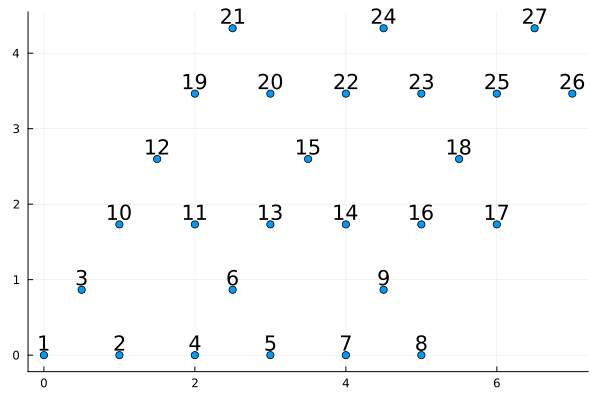

In [38]:
plot_points(sites, site_coord, site_number)

In [39]:
neighbor = [0, -1, 3]

3-element Vector{Int64}:
  0
 -1
  3

In [40]:
neighbor_site = get_neighbor_site(sites[1], neighbor, LL,true)

3-element Vector{Int64}:
 0
 2
 3

In [41]:
site_number[neighbor_site], site_coord[neighbor_site]

(21, [2.5, 4.330127018922193])

In [42]:
neighbors_list = [
                 [ [0, 0, 2], [0, 0, 3], [-1, 0, 2], [ 0, -1, 3]  ], # Type of A
                 [ [0, 0, 1], [0, 0, 3], [ 1, 0, 1], [ 1, -1, 3]  ], # Type of B
                 [ [0, 0, 1], [0, 0, 2], [ 0, 1, 1], [-1,  1, 2]  ] # Type of C
                 ]

3-element Vector{Vector{Vector{Int64}}}:
 [[0, 0, 2], [0, 0, 3], [-1, 0, 2], [0, -1, 3]]
 [[0, 0, 1], [0, 0, 3], [1, 0, 1], [1, -1, 3]]
 [[0, 0, 1], [0, 0, 2], [0, 1, 1], [-1, 1, 2]]

In [43]:
i_site = 27
neighbor_sites = get_neighbors(sites[i_site],neighbors_list[sites[i_site][3]],LL);

In [44]:
for neighbor_site in neighbor_sites
    println(site_number[neighbor_site], site_coord[neighbor_site])
end

25[6.0, 3.4641016151377544]
26[7.0, 3.4641016151377544]
7[4.0, 0.0]
5[3.0, 0.0]


In [45]:
pbc=false
site_neigbors = get_all_neighbors(sites,neighbors_list,LL,pbc);

In [46]:
i_site=27
for neighbor_site in site_neigbors[sites[i_site]]
    println(site_number[neighbor_site])
end

25
26
